In [1]:
#Hint only for Mac users, if you experience troubles on MacOS M1/M2, downgrade jupyterlab and tornado pip install jupyterlab==3.0.0 tornado==6.1

In [2]:
#Install packages
!pip install numpy matplotlib seaborn umap-learn

In [3]:
#Some technical staff 
%matplotlib notebook
import pandas as pd
import numpy as np
from io import StringIO
from rdkit import Chem
from sklearn.preprocessing import StandardScaler
from rdkit.Chem.MolStandardize import rdMolStandardize
import ipywidgets as widgets
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from rdkit.Chem import Draw
from PIL import Image, ImageDraw, ImageFont
import itertools
from sklearn.decomposition import PCA
from IPython.display import Image

## The analysis of drug descriptions (text) by UMAP

We will use the same DRD2 dataset. 

In [4]:
drd_source_file = """name|description|chembl|smiles\ndroperidol|A butyrophenone with general properties similar to those of haloperidol. It is used in conjunction with an opioid analgesic such as fentanyl to maintain the patient in a calm state of neuroleptanalgesia with indifference to surroundings but still able to cooperate with the surgeon. It is also used as a premedicant, as an antiemetic, and for the control of agitation in acute psychoses. (From Martindale, The Extra  Pharmacopoeia, 29th ed, p593)|CHEMBL1108|FC1=CC=C(C=C1)C(=O)CCCN1CCC(=CC1)N1C(=O)NC2=CC=CC=C12\nmetoclopramide|"Diabetic gastroparesis is a condition that causes frequent nausea and vomiting, which has a negative impact on quality of life and poses a significant burden on the healthcare system.[A184934] Metoclopramide is a dopamine antagonist used to treat nausea and vomiting that may be associated with diabetic gastroparesis in addition to gastroesophageal reflux disease (GERD). It can also be used to prevent nausea or vomiting associated with chemotherapy or certain surgical or diagnostic procedures.[L8417] \r\n\r\nOne unique property of this drug is that it does not increase gastric acid secretion. It is available in the oral tablet form or in solution, and can also be administered through the intravenous route.[T683] Metoclopramide was initially approved by the FDA in 1980.[A184922]"|CHEMBL86|CCN(CC)CCNC(=O)C1=CC(Cl)=C(N)C=C1OC\npaliperidone|Paliperidone is the primary active metabolite of risperidone. The mechanism of action is unknown but it is likely to act via a similar pathway to risperidone. It has been proposed that the drug\'s therapeutic activity in schizophrenia is mediated through a combination of central dopamine Type 2 (D2) and serotonin Type 2 (5HT2A) receptor antagonism. Paliperidone is also active as an antagonist at alpha 1 and alpha 2 adrenergic receptors and H1 histaminergic receptors, which may explain some of the other effects of the drug. Paliperidone was approved by the FDA for treatment of schizophrenia on December 20, 2006. It is available as an extended-release tablet, a once-monthly intramuscular injection, an every-three-month intramuscular injection, and a twice-yearly gluteal injection.[L16168,L37744,L4137,L37749]|CHEMBL1621|CC1=C(CCN2CCC(CC2)C2=NOC3=C2C=CC(F)=C3)C(=O)N2CCCC(O)C2=N1\nlurasidone|Lurasidone is an atypical antipsychotic developed by Dainippon Sumitomo Pharma. It was approved by the U.S. Food and Drug Administration (FDA) for treatment of schizophrenia on October 29, 2010 and is currently pending approval for the treatment of bipolar disorder in the United States.|CHEMBL1237021|[H][C@@]12[C@H]3CC[C@H](C3)[C@]1([H])C(=O)N(C[C@@H]1CCCC[C@H]1CN1CCN(CC1)C1=NSC3=CC=CC=C13)C2=O\ntiapride|Tiapride is a selective D2 and D3 dopamine receptor blocker in the brain.|CHEMBL84158|CCN(CC)CCNC(=O)C1=CC(=CC=C1OC)S(C)(=O)=O\nhaloperidol|"Haloperidol is a high potency first-generation (typical) antipsychotic and one of the most frequently used antipsychotic medications used worldwide.[A180616] While haloperidol has demonstrated pharmacologic activity at a number of receptors in the brain,[A27477] it exerts its antipsychotic effect through its strong antagonism of the dopamine receptor (mainly D2), particularly within the mesolimbic and mesocortical systems of the brain. Haloperidol is indicated for the treatment of the manifestations of several psychotic disorders including schizophrenia, acute psychosis, Tourette syndrome, and other severe behavioural states.[F4645] It is also used off-label for the management of chorea associated with Huntington\'s disease and for the treatment of intractable hiccups as it is a potent antiemetic. Dopamine-antagonizing medications such as haloperidol are though to improve psychotic symptoms and states that are caused by an over-production of dopamine, such as schizophrenia, which is theorized to be caused by a hyperdopaminergic state within the limbic system of the brain.[A34360]\r\n\r\nUse of the first-generation antipsychotics (including haloperidol) is considered highly effective for the management of the ""positive"" symptoms of schizophrenia including hallucinations, hearing voices, aggression/hostility, disorganized speech, and psychomotor agitation. However, this class of drugs is also limited by the development of movement disorders induced by dopamine-blockade such as drug-induced parkinsonism, akathisia, dystonia, tardive dyskinesia, as well as other side effects including sedation, weight gain, and prolactin changes. While there are limited high-quality studies comparing haloperidol to lower-potency first-generation antipsychotics such as [DB00477], [DB01624], [DB00623], and [DB01403], haloperidol typically demonstrates the least amount of side effects within this class, but demonstrates a stronger disposition for causing extrapyramidal symptoms (EPS).[A180613, A180616, A180625] These other low‐potency antipsychotics are limited by their lower affinity for dopamine receptors, which requires a higher dose to effectively treat symptoms of schizophrenia. In addition, they block many receptors other than the primary target (dopamine receptors), such as cholinergic or histaminergic receptors, resulting in a higher incidence of side effects such as sedation, weight gain, and hypotension.\r\n\r\nInterestingly, in vivo pharmacogenetic studies have demonstrated that the metabolism of haloperidol may be modulated by genetically determined polymorphic _CYP2D6_ activity. However, these findings contradict the findings from studies in vitro with human liver microsomes and from drug interaction studies in vivo. Inter-ethnic and pharmacogenetic differences in haloperidol metabolism may possibly explain these observations.[A32346]\r\n\r\nFirst-generation antipsychotic drugs have largely been replaced with second- and third-generation (atypical) antipsychotics such as [DB00734], [DB00334], [DB00363], [DB01224], [DB01238], and [DB00246]. However, haloperidol use remains widespread and is considered the benchmark for comparison in trials of the newer generation antipsychotics.[A180625]\r\n\r\nThe efficacy of haloperidol was first established in controlled trials in the 1960s.[A180610]"|CHEMBL54|OC1(CCN(CCCC(=O)C2=CC=C(F)C=C2)CC1)C1=CC=C(Cl)C=C1\nasenapine|Developed by Schering-Plough after its merger with Organon International, asenapine is a sublingually administered, atypical antipsychotic for treatment of schizophrenia and acute mania associated with bipolar disorder. Asenapine also belongs to the dibenzo-oxepino pyrrole class. It is also for severe post-traumatic stress disorder nightmares in soldiers as an off-label use. FDA approved on August 13, 2009.|CHEMBL3187365|CN1CC2C(C1)C1=C(OC3=CC=C(Cl)C=C23)C=CC=C1\nchlorpromazine|The prototypical phenothiazine antipsychotic drug. Like the other drugs in this class, chlorpromazine\'s antipsychotic actions are thought to be due to long-term adaptation by the brain to blocking dopamine receptors. Chlorpromazine has several other actions and therapeutic uses, including as an antiemetic and in the treatment of intractable hiccup.|CHEMBL71|CN(C)CCCN1C2=CC=CC=C2SC2=C1C=C(Cl)C=C2\naripiprazole|Aripiprazole is an atypical antipsychotic orally indicated for the treatment of schizophrenia, bipolar I, major depressive disorder, irritability associated with autism, and Tourette\'s.[L45859] It is also indicated as an injection for agitation associated with schizophrenia or bipolar mania.[L45859] Aripiprazole exerts its effects through agonism of dopaminergic and 5-HT1A receptors and antagonism of alpha-adrenergic and 5-HT2A receptors.[L45859,A4393] Aripiprazole was given FDA approval on November 15, 2002.[L6136]|CHEMBL1112|ClC1=CC=CC(N2CCN(CCCCOC3=CC4=C(CCC(=O)N4)C=C3)CC2)=C1Cl\nrisperidone|"Risperidone is a second-generation antipsychotic (SGA) medication used in the treatment of a number of mood and mental health conditions including schizophrenia and bipolar disorder.[L12885] It is one of the most widely used SGAs. [Paliperidone], another commonly used SGA, is the primary active metabolite of risperidone (i.e. 9-hydroxyrisperidone).[L12885]\r\n\r\nSchizophrenia and various mood disorders are thought to be caused by an excess of dopaminergic D2 and serotonergic 5-HT2A activity, resulting in overactivity of central mesolimbic pathways and mesocortical pathways, respectively. Risperidone is thought to reduce this overactivity through inhibition of dopaminergic D2 receptors and serotonergic 5-HT2A receptors in the brain.[L12885]\r\n\r\nRisperidone binds with a very high affinity to 5-HT2A receptors, approximately 10-20 fold greater than the drug\'s binding affinity to D2 receptors, and carries lesser activity at several off-targets which may responsible for some of its undesirable effects.[L12885]"|CHEMBL85|CC1=C(CCN2CCC(CC2)C2=NOC3=C2C=CC(F)=C3)C(=O)N2CCCCC2=N1\namisulpride|"Amisulpride is a benzamide derivative and a dopamine receptor antagonist that selectively works on dopamine D2 and D3 receptors. As an antipsychotic agent, amisulpride alleviates both positive and negative symptoms of schizophrenia, and it exhibits antidepressant properties in patients with psychiatric disorders, dysthymia, and major depression.[A6755] Amisulpride predominantly works in the limbic system, which explains its relatively lower risk of extrapyramidal adverse effects compared to other atypical antipsychotic agents.[A6752, L32764] Oral tablets of amisulpride is used in European countries as a treatment for acute and chronic schizophrenic disorders, as well as secondary negative symptoms in mental health disorders such as affective disorders, depressive mood, and mental retardation.[L32764]\r\n\r\nAmisulpride is also used as an antiemetic agent. In the US, the intravenous formulation of amisulpride is used to treat and prevent postoperative nausea and vomiting in adults, either as monotherapy or in combination with another antiemetic agent of a different drug class.[L32759] It is marketed under the brand name Barhemsys."|CHEMBL243712|CCN1CCCC1CNC(=O)C1=CC(=C(N)C=C1OC)S(=O)(=O)CC\npipamperone|"Pipamperone is a typical antipsychotic of the _butyrophenone_ family used in the treatment of schizophrenia. It was developed by Janssen Pharmaceutica in 1961 and started its first round of clinical trials in 1963 [L1514, L1518].\r\n\r\nIn an effort to improve [haloperidol]\'s pharmacological effects, Janssen discovered that pipamperone, an agent whose pharmacological profile was distinct from haloperidol and all other known antipsychotic drugs at this time, had significant anti-tryptamine activity. Some studies suggest pipamperone was the first atypical antipsychotic. Interestingly, when [risperidone] was created, Janssen suggested it was a more potent version of pipamperone. Synthesized in the year 1984, risperidone’s pharmacological properties were similar to pipamperone’s in that both block more serotonin more potently than dopamine [L1518]."|CHEMBL440294|NC(=O)C1(CCN(CCCC(=O)C2=CC=C(F)C=C2)CC1)N1CCCCC1\nsulpiride|"Sulpiride first appeared in published literature in 1967.[A229538] Clinical studies show a greater effect on treating the negative symptoms of schizophrenia rather than positive symptoms at low doses, though the effects are more equal at higher doses.[A229683]\r\n\r\nSulpiride is not approved by the FDA, Health Canada, or the EMA; though it is approved in individual European countries.[L24679]"|CHEMBL26|CCN1CCCC1CNC(=O)C1=C(OC)C=CC(=C1)S(N)(=O)=O\npromazine|A phenothiazine with actions similar to chlorpromazine but with less antipsychotic activity. It is primarily used in short-term treatment of disturbed behavior and as an antiemetic. It is currently not approved for use in the United States.|CHEMBL564|CN(C)CCCN1C2=CC=CC=C2SC2=CC=CC=C12\nprochlorperazine|Prochlorperazine, also known as compazine, is a piperazine phenothiazine and first-generation antipsychotic drug that is used for the treatment of severe nausea and vomiting, as well as short-term management of psychotic disorders such as generalized non-psychotic anxiety and schizophrenia.[label] It mainly works by depressing the chemoreceptor trigger zone and blocking D2 dopamine receptors in the brain. It was shown to also block histaminergic, cholinergic and noradrenergic receptors.[L6637] Prochlorperazine was first developed in the 1950s [L6643] and was first approved by the FDA in 1956. Although newer antiemetic agents such as 5-HT3 antagonists are more heavily promoted, prochlorperazine is still widely used in nausea and vomiting.[L6640]|CHEMBL728|CN1CCN(CCCN2C3=CC=CC=C3SC3=C2C=C(Cl)C=C3)CC1\nfluphenazine|A phenothiazine used in the treatment of psychoses. Its properties and uses are generally similar to those of chlorpromazine.|CHEMBL726|OCCN1CCN(CCCN2C3=CC=CC=C3SC3=C2C=C(C=C3)C(F)(F)F)CC1\ntrifluoperazine|A phenothiazine with actions similar to chlorpromazine. It is used as an antipsychotic and an antiemetic.|CHEMBL422|CN1CCN(CCCN2C3=CC=CC=C3SC3=C2C=C(C=C3)C(F)(F)F)CC1\npromethazine|"Promethazine, originally known as 3,277 R.P., is an N-dimethylaminopropyl derivative of [phenothiazine] that was developed in France in 1946.[A189901] Promethazine antagonizes a variety of receptors, allowing it to be used for a number of indications including allergic reactions, pain, sedation, nausea, and vomiting.[A189907,A190153,A190159,A190150,A190171]\r\n\r\nPromethazine was granted FDA approval before 29 March 1951.[A190177,L4000]"|CHEMBL643|CC(CN1C2=CC=CC=C2SC2=CC=CC=C12)N(C)C\npimozide|A diphenylbutylpiperidine that is effective as an antipsychotic agent and as an alternative to haloperidol for the suppression of vocal and motor tics in patients with Tourette syndrome. Although the precise mechanism of action is unknown, blockade of postsynaptic dopamine receptors has been postulated. (From AMA Drug Evaluations Annual, 1994, p403)|CHEMBL1423|FC1=CC=C(C=C1)C(CCCN1CCC(CC1)N1C(=O)NC2=CC=CC=C12)C1=CC=C(F)C=C1\ndomperidone|A specific blocker of dopamine receptors. It speeds gastrointestinal peristalsis, causes prolactin release, and is used as antiemetic and tool in the study of dopaminergic mechanisms.|CHEMBL219916|ClC1=CC2=C(C=C1)N(C1CCN(CCCN3C(=O)NC4=CC=CC=C34)CC1)C(=O)N2\nziprasidone|"Disorders such as schizophrenia and bipolar disorder can significantly impair mood, cognition, and behavior.[A190525] These mental illnesses can often be accompanied by comorbidities such as depression and substance abuse, and can significantly impact the quality of life of patients and caregivers.[A190525] Luckily, several treatment options for psychotic disorders have been introduced to market since the realization of chlorpromazine\'s antipsychotic properties in 1952.[A190525] \r\n\r\nSecond generation antipsychotics (commonly referred to as atypical antipsychotics) include [clozapine], [quetiapine], [olanzapine], [aripiprazole] and [ziprasidone] among others, and are generally thought to be as efficacious as first generation antipsychotics but differ in their adverse effect profiles.[A190525,A190534] First generation antipsychotics are associated with extrapyramidal adverse effects while atypical antipsychotics are linked to weight gain, impaired glucose tolerance and metabolic syndrome.[A190534,A190537] \r\n\r\nZiprasidone is used to treat schizophrenia and bipolar disorder.[A180748] It can effectively reduce the rate and time of relapses in schizophrenia, and can be used to treat manic episodes in bipolar disorder although the mechanism of action is unknown.[A180748] Although ziprasidone is classified as an atypical antipsychotic, it appears to have a lower incidence of metabolic adverse effects compared to other medications in the same class.[A190525]"|CHEMBL708|ClC1=C(CCN2CCN(CC2)C2=NSC3=CC=CC=C23)C=C2CC(=O)NC2=C1\nolanzapine|Olanzapine is a thienobenzodiazepine classified as an atypical or second-generation antipsychotic agent.[A176996] The second-generation antipsychotics were introduced in the 90s and quickly gained traction due to their impressive efficacy, reduced risk for extrapyramidal side effects and reduced susceptibility to drug-drug interactions.[A177011] Olanzapine very closely resembles [clozapine] and only differs by two additional methyl groups and the absence of a chloride moiety.[T554] It was discovered by scientists at Eli Lilly and approved to be marketed in the US in 1996.[T548]|CHEMBL715|CN1CCN(CC1)C1=NC2=CC=CC=C2NC2=C1C=C(C)S2\nclozapine|"Clozapine is a tricyclic dibenzodiazepine, classified as an atypical antipsychotic agent.[A256708] Clozapine displays affinity to various neuroreceptors with a particularly low affinity to the dopamine receptors, thus breaking the mold of first-generation antipsychotics and deeming it ""atypical"".[A256723]. This low affinity to dopamine receptors results in fewer extrapyramidal side effects, especially tardive dyskinesia.[A185747] However, its promiscuity toward the muscarinic and adrenergic receptors can result in other side effects, notably gastrointestinal hypomotility and orthostatic hypotension. [L905,A215552]. Despite its effectiveness in treating both positive and negative symptoms of schizophrenia, clozapine was briefly removed from the market in various jurisdictions in 1970 due to severe agranulocytosis.[A256713,A256718] However, continued evidence of its effectiveness led to clozapine\'s eventual reintroduction, although with a reluctance to prescribe it.[A256718] \r\n\r\nClozapine was approved by the FDA in 1989 for treatment-resistant schizophrenia under the brand CLOZARIL.[L905] Due to its severe adverse effects profile, clozapine is only available through a restricted program under a Risk Evaluation Mitigation Strategy (REMS) called the Clozapine REMS Program.[L905]"|CHEMBL42|CN1CCN(CC1)C1=NC2=CC(Cl)=CC=C2NC2=CC=CC=C12\nbuspirone|Buspirone is a novel anxiolytic agent with a unique structure and a pharmacological profile. Belonging to the azaspirodecanedione drug class,[A180991] buspirone is a serotonin 5-HT<sub>1A</sub> receptor agonist that is not chemically or pharmacologically related to benzodiazepines, barbiturates, and other sedative/anxiolytic drugs.[L4478] Unlike many drugs used to treat anxiety, buspirone does not exhibit anticonvulsant, sedative, hypnotic, and muscle-relaxant properties. Due to these characteristics, buspirone been termed \'anxioselective\'.[A180985] First synthesized in 1968 then patented in 1975,[L7375] it is commonly marketed under the brand name Buspar®. Buspirone was first approved in 1986 by the FDA [A181751] and has been used to treat anxiety disorders, such as generalized anxiety disorder (GAD), and relieve symptoms of anxiety. It has also been used as a second-line therapy for unipolar depression when the use of selective serotonin reuptake inhibitors (SSRIs) is deemed clinically inadequate or inappropriate.[L7375] The potential use of buspirone in combination with [melatonin] in depression and cognitive impairment via promoting neurogenesis has also been investigated.[A181751]|CHEMBL49|O=C1CC2(CCCC2)CC(=O)N1CCCCN1CCN(CC1)C1=NC=CC=N1\nthioridazine|"A phenothiazine antipsychotic used in the management of psychoses, including schizophrenia, and in the control of severely disturbed or agitated behavior. It has little antiemetic activity. Thioridazine has a higher incidence of antimuscarinic effects, but a lower incidence of extrapyramidal symptoms, than chlorpromazine. (From Martindale, The Extra Pharmacopoeia, 30th ed, p618).\r\n\r\nThioridazine was withdrawn worldwide in 2005 due to its association with cardiac arrythmias."|CHEMBL479|CSC1=CC2=C(SC3=CC=CC=C3N2CCC2CCCCN2C)C=C1\npropiomazine|Propiomazine, an atypical antipsychotic agent, is used to treat both negative and positive symptoms of schizophrenia, acute mania with bipolar disorder, agitation, and psychotic symptoms in dementia. Future uses may include the treatment of obsessive-compulsive disorder and severe behavioral disorders in autism. Structurally and pharmacologically similar to clozapine, propiomazine binds to alpha(1), dopamine, histamine H1, muscarinic, and serotonin type 2 (5-HT2) receptors.|CHEMBL1201210|CCC(=O)C1=CC2=C(SC3=CC=CC=C3N2CC(C)N(C)C)C=C1\nperphenazine|An antipsychotic phenothiazine derivative with actions and uses similar to those of chlorpromazine.|CHEMBL567|OCCN1CCN(CCCN2C3=CC=CC=C3SC3=C2C=C(Cl)C=C3)CC1\nflupentixol|"Flupentixol is an antipsychotic drug of the thioxanthene group. It exists in two geometric isomers, the trans(E) and pharmacologically active cis(Z) forms. Flupentixol decanoate is one of the active ingredients found in injectable drug formulations: it is produced by esterification of cis(Z)‐flupentixol with decanoic acid.[A229083] Flupentixol is an antagonist of both D1 and D2 dopamine receptors.[A229083]\r\n\r\nAvailable as oral tablets or long-acting intramuscular injections, flupentixol is marketed under brand names such as Depixol and Fluanxol. It is approved for use in Canada and other countries around the world, but not in the US. It is used for the management of chronic schizophrenia in patients whose main manifestations do not include excitement, agitation or hyperactivity.[L31808] It has been marketed to manage symptoms of depression in patients who may or may not exhibit signs of anxiety.[L31928] In combination with [melitracen], flupentixol is used to manage symptoms of anxiety, depression, and asthenia.[L31923]"|CHEMBL54661|[H]\\C(CCN1CCN(CCO)CC1)=C1/C2=CC=CC=C2SC2=C1C=C(C=C2)C(F)(F)F\nquetiapine|Initially approved by the FDA in 1997, quetiapine is a second-generation atypical antipsychotic used in schizophrenia, major depression, and bipolar disorder.[L8546] Quetiapine demonstrates a high level of therapeutic efficacy and low risk of adverse effects during long-term treatment. It is well-tolerated and a suitable option for some patients with high sensitivity to other drugs, such as [clozapine] and [olanzapine].[A2189]|CHEMBL716|OCCOCCN1CCN(CC1)C1=NC2=CC=CC=C2SC2=CC=CC=C12\nchlorprothixene|Chlorprothixene is a typical antipsychotic drug of the thioxanthene (tricyclic) class. Chlorprothixene exerts strong blocking effects by blocking the 5-HT2 D1, D2, D3, histamine H1, muscarinic and alpha1 adrenergic receptors.|CHEMBL908|CN(C)CC\\C=C1\\C2=CC=CC=C2SC2=CC=C(Cl)C=C12\nzuclopenthixol|Zuclopenthixol, also known as Zuclopentixol or Zuclopenthixolum, is an antipsychotic agent. Zuclopenthixol is a thioxanthene-based neuroleptic with therapeutic actions similar to the phenothiazine antipsychotics. It is an antagonist at D1 and D2 dopamine receptors. Major brands of zuclopenthixol are Cisordinol, Acuphase, and Clopixol. This drug is a liquid. This compound belongs to the thioxanthenes. These are organic polycyclic compounds containing a thioxanthene moiety, which is an aromatic tricycle derived from xanthene by replacing the oxygen atom with a sulfur atom. Known drug targets of zuclopenthixol include 5-hydroxytryptamine receptor 2A, D(1B) dopamine receptor, D(2) dopamine receptor, D(1A) dopamine receptor, and alpha-1A adrenergic receptor. It is known that zuclopenthixol is metabolized by Cytochrome P450 2D6. Zuclopenthixol was approved for use in Canada in 2011, but is not approved for use in the United States.|CHEMBL53904|OCCN1CCN(CC\\C=C2\\C3=C(SC4=C2C=C(Cl)C=C4)C=CC=C3)CC1\nloxapine|An antipsychotic agent used in schizophrenia. [PubChem]|CHEMBL831|CN1CCN(CC1)C1=NC2=CC=CC=C2OC2=C1C=C(Cl)C=C2\niloperidone|Iloperidone is an atypical antipsychotic for the treatment of schizophrenia symptoms. Hoechst Marion Roussel Inc. researched the drug until May 1996. In June 1997 they gave the research rights to Titan Pharmaceuticals, who gave the worldwide development, manufacturing, and marketing rights to Novartis in August 1998. On June 9, 2004, Titan Pharmaceuticals gave the Phase III development rights to Vanda Pharmaceuticals. FDA approved on May 9, 2009.|CHEMBL14376|COC1=C(OCCCN2CCC(CC2)C2=NOC3=C2C=CC(F)=C3)C=CC(=C1)C(C)=O\nmethotrimeprazine|A phenothiazine with pharmacological activity similar to that of both chlorpromazine and promethazine. It has the histamine-antagonist properties of the antihistamines together with central nervous system effects resembling those of chlorpromazine. (From Martindale, The Extra Pharmacopoeia, 30th ed, p604)|CHEMBL1764|COC1=CC2=C(SC3=C(C=CC=C3)N2C[C@H](C)CN(C)C)C=C1\namoxapine|Amoxapine, the <i>N</i>-demethylated derivative of the antipsychotic agent loxapine, is a dibenzoxazepine-derivative tricyclic antidepressant (TCA). TCAs are structurally similar to phenothiazines. They contain a tricyclic ring system with an alkyl amine substituent on the central ring. In non-depressed individuals, amoxapine does not affect mood or arousal, but may cause sedation. In depressed individuals, amoxapine exerts a positive effect on mood. TCAs are potent inhibitors of serotonin and norepinephrine reuptake. In addition, TCAs down-regulate cerebral cortical &beta;-adrenergic receptors and sensitize post-synaptic serotonergic receptors with chronic use. The antidepressant effects of TCAs are thought to be due to an overall increase in serotonergic neurotransmission. TCAs also block histamine H<sub>1</sub> receptors, &alpha;<sub>1</sub>-adrenergic receptors and muscarinic receptors, which accounts for their sedative, hypotensive and anticholinergic effects (e.g. blurred vision, dry mouth, constipation, urinary retention), respectively. See toxicity section below for a complete listing of side effects. Amoxapine may be used to treat neurotic and reactive depressive disorders, endogenous and psychotic depression, and mixed symptoms of depression and anxiety or agitation.|CHEMBL1113|ClC1=CC2=C(OC3=CC=CC=C3N=C2N2CCNCC2)C=C1\nalizapride|Alizapride is a dopamine antagonist that is capable of demonstrating both prokinetic and antiemetic effects. This kind of pharmacological activity makes it effective for use in the treatment of various kinds of nausea and vomiting, including that which may occur postoperatively.|CHEMBL290194|COC1=CC2=NNN=C2C=C1C(=O)NCC1CCCN1CC=C\nnortriptyline|Nortriptyline hydrochloride, the active metabolite of [amitriptyline], is a tricyclic antidepressant (TCA).[L11878] It is used in the treatment of major depression and is also used off-label for chronic pain and other conditions.[L11881]|CHEMBL445|CNCCC=C1C2=CC=CC=C2CCC2=CC=CC=C12\nmianserin|A tetracyclic compound with antidepressant effects. Mianserin was previously available internationally, however in most markets it has been phased out in favour of [mirtazapine].|CHEMBL6437|CN1CCN2C(C1)C1=CC=CC=C1CC1=CC=CC=C21\nperospirone|Perospirone is an atypical or second-generation antipsychotic of the azapirone family that antagonizes serotonin 5HT2A receptors and dopamine D2 receptors. It also displays affinity towards 5HT1A receptors as a partial agonist. Dainippon Sumitomo Pharma developed perospirone in Japan in 2001 for the treatment of acute schizophrenia and bipolar mania as well as chronic schizophrenia. It is commonly present as the hydrated hydrochloride salt form. Classified as a neuroleptic agent, perospirone is shown to be effective against positive, negative and general symptoms in patients with schizophrenia [A19676]. It is also shown to be less associated with extrapyramidal symptoms as a side effect compared to [DB00502].|CHEMBL1472975|[H][C@@]12CCCC[C@]1([H])C(=O)N(CCCCN1CCN(CC1)C1=NSC3=CC=CC=C13)C2=O\nblonanserin|Blonanserin is an atypical antipsychotic approved in Japan in January, 2008. It offers improved tolerability as it lacks side effects such as extrapyramidal symptoms, excessive sedation, or hypotension. As a second-generation (atypical) antipsychotic, it is significantly more efficacious in the treatment of the negative symptoms of schizophrenia compared to first-generation (typical) antipsychotics.|CHEMBL178803|CCN1CCN(CC1)C1=NC2=C(CCCCCC2)C(=C1)C1=CC=C(F)C=C1\nzotepine|Zotepine, with the formula (2-chloro-11-(2-dimethyl-amino-ethoxy)-dibenzo thiepin, is a neuroleptic drug. It was designed and synthesized by Fujisawa Pharmaceutical Co Ltd.[A31855] It has been used as an antipsychotic in Japan, India and some places in Europe like UK and Germany since 1980\'s.[A31857] Zotepine was never approved by the FDA. In 1993, it was classified as inactive drug substance (Status I, Type II) and in 1995 the FDA studied the manufacturing procedures of Zotepine tablets in Germany, but the status remained inactive.[L1082] When the analysis of antipsychotics was retaken in 2016 by the FDA, zotepine did not reach the threshold effect to be further studied.[L1313]. In the EMA, by 2015 it was under pharmacovigilance studies for the potential treatment of acute renal failure.[L1314]|CHEMBL285802|CN(C)CCOC1=CC2=CC=CC=C2SC2=CC=C(Cl)C=C12\nmelperone|Melperone is an atypical antipsychotic of the butyrophenone chemical class, making it structurally related to the typical antipsychotic haloperidol.  Melperone has been used for a span of greater than 30 years in the European Union [L1316]. It has been well established in the treatment of confusion, anxiety, restlessness (particularly in the elderly) and schizophrenia as It is known to be well-tolerated with an excellent safety profile. Recently, it has been studied as a treatment of psychosis related to Parkinson\'s disease [L1316].|CHEMBL1531134|CC1CCN(CCCC(=O)C2=CC=C(F)C=C2)CC1\n"""

In [33]:
drd2 = pd.read_table(StringIO(drd_source_file),sep='|')
def get_by_name(name):
    return drd2[drd2['name'] == name].iloc[0]

In [35]:
get_by_name("metoclopramide").description

'Diabetic gastroparesis is a condition that causes frequent nausea and vomiting, which has a negative impact on quality of life and poses a significant burden on the healthcare system.[A184934] Metoclopramide is a dopamine antagonist used to treat nausea and vomiting that may be associated with diabetic gastroparesis in addition to gastroesophageal reflux disease (GERD). It can also be used to prevent nausea or vomiting associated with chemotherapy or certain surgical or diagnostic procedures.[L8417] \r\n\r\nOne unique property of this drug is that it does not increase gastric acid secretion. It is available in the oral tablet form or in solution, and can also be administered through the intravenous route.[T683] Metoclopramide was initially approved by the FDA in 1980.[A184922]'

#### The dataset is ready

### Text embeddings

In this exercise, we will visualize drug descriptions. In the first stage, the drug descriptions were converted into fixed-length vectors (Text Embedding) using the NOMIC model. This stage has already been completed; we will simply load the precomputed embeddings here.

In [7]:
#We have precomputed embeddings, so you do not need to run this code!!! 

#from nomic import embed
#embeddings = embed.text(
#        texts=drd2['description'].tolist(),
#        model='nomic-embed-text-v1.5',
#        task_type='search_document',
#)

#embeddings_numpy = np.array(embeddings['embeddings'])
#np.save("nomic_drug_descriptions",embeddings_numpy)

In [8]:
#Just load the precomputed embeddings
embeddings = np.load("nomic_drug_descriptions.npy")

In [24]:
import umap
reducer = umap.UMAP(
    n_neighbors=5,
    min_dist=0.0,
    n_components=2,
    random_state=42,
)
coords = reducer.fit_transform(embeddings)
#And just wait a bit, until the calculations finish

In [22]:
drd2['x'] = coords[:,0]
drd2['y'] = coords[:,1]

<IPython.core.display.Javascript object>


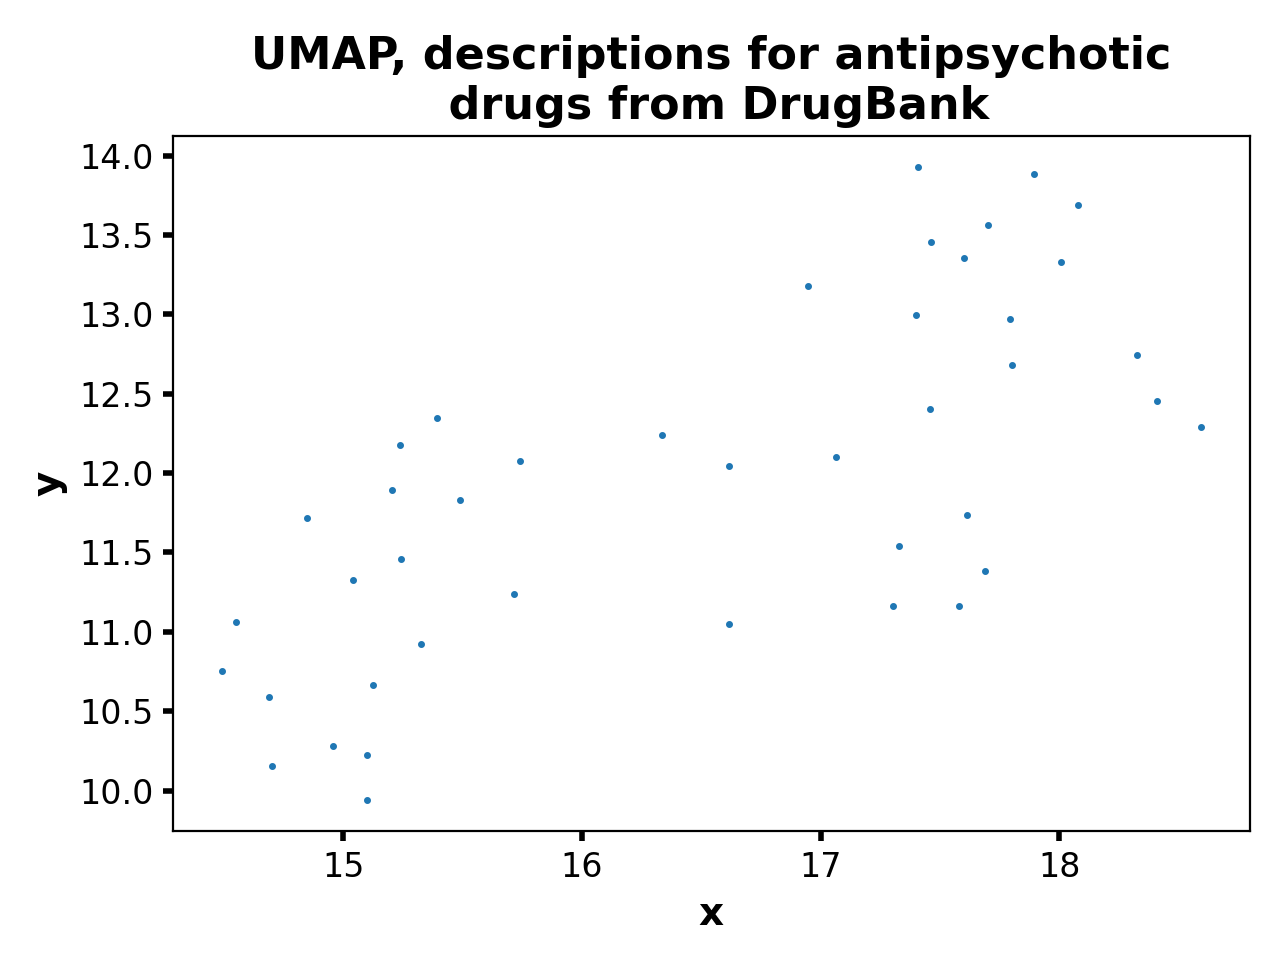

In [25]:
def visualize_molecules_with_descriptors(df, x_col, y_col, title):
    # Generate RDKit images from DataFrame SMILES
    mols = [Chem.MolFromSmiles(smile) for smile in df['smiles']]
    mol_images = [Draw.MolToImage(mol, size=(300, 150), fitImage=True) for mol in mols]

    # Create figure and plot scatter
    #fig = plt.figure(figsize=(8, 6))
    #ax = fig.add_subplot(111)

    x = df[x_col]
    y = df[y_col]
    plt.ioff()
    fig, ax = plt.subplots()
    plt.ion()
    line, = ax.plot(x, y, ls="", marker="o",markersize=1.5)
    
    # Set the title and axes labels
    ax.set_title(title, fontsize=16, fontweight='bold', family='sans-serif')
    ax.set_xlabel(x_col, fontsize=14, fontweight='bold')
    ax.set_ylabel(y_col, fontsize=14, fontweight='bold')
    plt.tick_params('both', width=2, labelsize=12)
    plt.tight_layout()
    
    # Create the annotations box with the first image
    zoom_factor = 0.3  # Adjust the zoom factor to scale the images appropriately
    im = OffsetImage(np.array(mol_images[0]), zoom=zoom_factor)
    xybox = (50., 50.)
    ab = AnnotationBbox(im, (0, 0), xybox=xybox, xycoords='data',
                        boxcoords="offset points", pad=0.3, arrowprops=dict(arrowstyle="->"))
    # Add it to the axes and make it invisible
    ax.add_artist(ab)
    ab.set_visible(False)

    def hover(event):
        if line.contains(event)[0]:
            ind, = line.contains(event)[1]["ind"]
            w, h = fig.get_size_inches()*fig.dpi
            ws = (event.x > w/2.)*-1 + (event.x <= w/2.)
            hs = (event.y > h/2.)*-1 + (event.y <= h/2.)
            ab.xybox = (xybox[0]*ws, xybox[1]*hs)
            ab.set_visible(True)
            ab.xy = (x[ind], y[ind])
            
            im.set_data(mol_images[ind])
        else:
            ab.set_visible(False)
        fig.canvas.draw_idle()

    # Connect the hover function
    cid = fig.canvas.mpl_connect('motion_notify_event', hover)
    plt.show()
visualize_molecules_with_descriptors(drd2,'x','y',title='UMAP, descriptions for antipsychotic\n drugs from DrugBank')    

##### Questions:

**Q1**: Try several runs of UMAP with different random states. What does change? 

**A1**: <write your answer here>   


**Q1**: Try to identify  

**A1**: <write your answer here>   
